In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths

In [14]:
# Load the dataset
data = pd.read_csv('Simulator_readings.csv')

In [16]:
# Display the first few rows
data.head()

,Time(ms),Fhr1(BPM),Fhr2(BPM),Uc(TOCO)
0,250,126,0,9
1,500,126,0,9
2,750,126,0,10
3,1000,126,0,10
4,1250,126,0,10


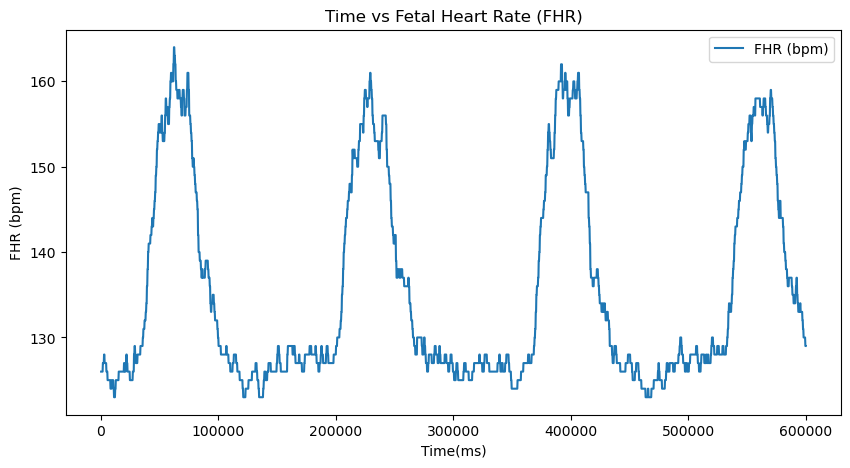

In [18]:
# Plot FHR vs Time
plt.figure(figsize=(10, 5))
plt.plot(data['Time(ms)'], data['Fhr1(BPM)'], label='FHR (bpm)')
plt.title('Time vs Fetal Heart Rate (FHR)')
plt.xlabel('Time(ms)')
plt.ylabel('FHR (bpm)')
plt.legend()
plt.show()

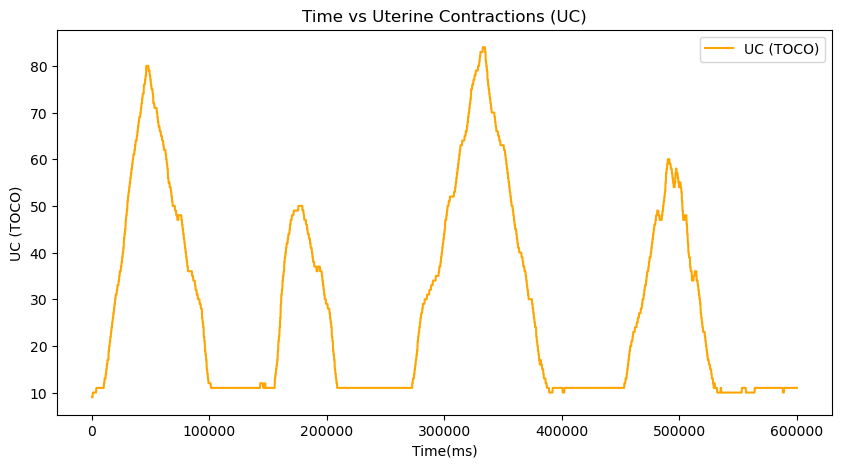

In [20]:
# Plot UC vs Time
plt.figure(figsize=(10, 5))
plt.plot(data['Time(ms)'], data['Uc(TOCO)'], label='UC (TOCO)', color='orange')
plt.title('Time vs Uterine Contractions (UC)')
plt.xlabel('Time(ms)')
plt.ylabel('UC (TOCO)')
plt.legend()
plt.show()

In [22]:
# Epoch duration in seconds
epoch_duration = 3.75
samples_per_epoch = int(epoch_duration / 0.25)  # 0.25 seconds per sample

In [24]:
# Initialize lists for bpm and pulse interval calculations
epoch_avg_bpm = []
epoch_pulse_interval = []

In [26]:
# Loop through the data in steps of the number of samples per epoch
for i in range(0, len(data), samples_per_epoch):
    epoch_data = data['Fhr1(BPM)'].iloc[i:i+samples_per_epoch]
    
    # Calculate average bpm for the epoch
    avg_bpm = epoch_data.mean()
    epoch_avg_bpm.append(avg_bpm)
    
    # Convert bpm to pulse interval in milliseconds
    # Pulse Interval (ms) = 60000 / bpm
    pulse_interval = 60000 / avg_bpm if avg_bpm != 0 else 0
    epoch_pulse_interval.append(pulse_interval)

In [28]:
# Convert to DataFrame for further analysis
epoch_df = pd.DataFrame({
    'Epoch': np.arange(len(epoch_avg_bpm)),
    'Average FHR (bpm)': epoch_avg_bpm,
    'Pulse Interval (ms)': epoch_pulse_interval
})

In [30]:
# Display the epoch analysis
epoch_df.head()

,Epoch,Average FHR (bpm),Pulse Interval (ms)
0,0,126.733333,473.435034
1,1,125.666667,477.453581
2,2,124.466667,482.056776
3,3,124.466667,482.056776
4,4,126.000000,476.190476


In [32]:
# Perform peak detection on UC data
uc_data = data['Uc(TOCO)'].values
peaks, _ = find_peaks(uc_data, height=0)

In [34]:
# Calculate the widths at half height
results_half = peak_widths(uc_data, peaks, rel_height=0.5)

In [36]:
# Widths are in samples, so convert to time (width * 250 ms per sample)
widths_in_seconds = results_half[0] * 0.25  # 250 ms = 0.25 seconds

In [38]:
# Count peaks where width > 30 seconds
wide_peaks = widths_in_seconds[widths_in_seconds > 30]
average_duration_of_wide_peaks = wide_peaks.mean()

In [40]:
# Print the results
print(f"Number of UC peaks wider than 30 seconds: {len(wide_peaks)}")
print(f"Average duration of peaks wider than 30 seconds: {average_duration_of_wide_peaks:.2f} seconds")

Number of UC peaks wider than 30 seconds: 4
Average duration of peaks wider than 30 seconds: 45.34 seconds
